In [1]:
import pandas as pd

In [2]:
from datetime import date


df = pd.read_csv('allfactors.csv',date_format='ISO8601', parse_dates=True)
df['date'] = pd.DatetimeIndex(df['date'])
df = df.set_index('date')

In [3]:
df

,mkt,smb,hml,rmw,cma,E,S,G,Total
date,,,,,,,,,
2014-01-02,0.005480,-0.018911,-0.016078,-0.008829,-0.000661,-0.000002,-0.000035,0.000104,-0.000059
2014-01-03,0.026072,-0.004521,-0.005980,0.007696,-0.006445,0.000181,0.000302,0.000010,0.000173
2014-01-06,-0.003476,-0.003543,0.011427,0.003944,0.003194,-0.000052,0.000009,0.000098,-0.000024
2014-01-07,0.000352,-0.001913,0.000962,-0.006109,0.003429,0.000083,-0.000004,-0.000014,-0.000005
2014-01-08,-0.002131,-0.003318,0.002747,0.002833,0.000507,-0.000026,-0.000014,0.000042,-0.000006
...,...,...,...,...,...,...,...,...,...
2023-09-21,-0.010283,0.002956,0.006223,0.001816,0.002366,0.000015,-0.000033,-0.000058,-0.000011
2023-09-22,-0.009168,-0.007270,0.005868,0.000215,0.005475,0.000020,0.000009,-0.000026,0.000018
2023-09-25,0.001925,-0.000495,0.002039,0.002355,0.001367,-0.000033,0.000002,0.000014,-0.000011


In [4]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'PTT.BK'  # Example: Apple Inc.

# Define the start date and end date
start_date = '2014-01-02'
end_date = '2023-09-28'

# Fetch the data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

stock_data

c:\Users\TGAdmin\anaconda3\envs\pymc_env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,28.50,28.700001,27.400000,27.400000,17.895191,34484000
2014-01-03,27.00,27.100000,26.500000,26.799999,17.503325,46203000
2014-01-06,26.90,26.900000,25.900000,26.400000,17.242079,62204000
2014-01-07,26.60,28.100000,26.500000,28.100000,18.352367,76936000
2014-01-08,28.10,28.799999,27.799999,28.500000,18.613613,60965000
...,...,...,...,...,...,...
2023-09-21,33.00,33.250000,32.500000,33.250000,32.431538,37673300
2023-09-22,33.25,34.000000,33.000000,33.500000,32.675385,84432400
2023-09-25,33.50,33.750000,33.250000,33.500000,32.675385,42607200


In [5]:
df['stock'] = stock_data.loc[:, 'Close']


In [6]:
df = df.dropna()

In [7]:
import numpy as np
df.loc[:, 'stock_ret'] = df['stock'].pct_change(fill_method=None)

In [8]:
df = df.dropna()

In [9]:
df = df.resample('M').agg(lambda x: (x+1).prod()-1)

C:\Users\TGAdmin\AppData\Local\Temp\ipykernel_25472\3690880213.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').agg(lambda x: (x+1).prod()-1)


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
Y = df.mkt
X = df.stock_ret
# X = sm.add_constant(X)

In [12]:
model = sm.OLS(Y, X).fit()

In [13]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mkt   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              127.8
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                    1.99e-20
Time:                        16:49:18   Log-Likelihood:                          248.21
No. Observations:                 117   AIC:                                     -494.4
Df Residuals:                     116   BIC:                                     -491.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [21]:
Y.mean()

0.004422241583529025

In [18]:
from pymc import HalfCauchy, Model, Normal, sample
import arviz as az

In [16]:
with Model() as model:
    sigma = HalfCauchy("sigma", beta=20)
    intercept = Normal("intercept", 0, sigma=20)
    beta = Normal("beta", 0, sigma=20)
    mu = X.values*beta + intercept
    likelihood = Normal("Y", mu=mu, sigma=sigma, observed=Y)

    idata = sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, intercept, beta]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 18 seconds.


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

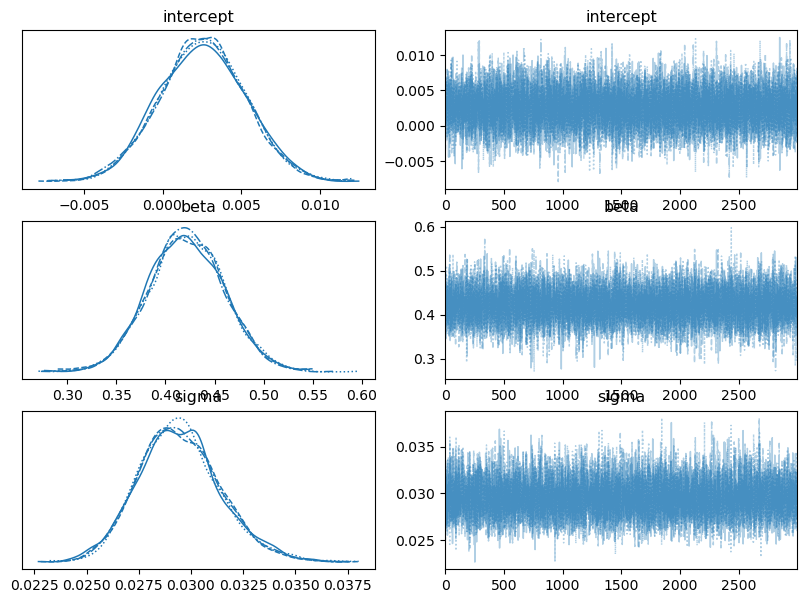

In [19]:
az.plot_trace(idata, figsize=(10, 7))

In [33]:
idata.posterior.intercept[0,:].mean()

<xarray.DataArray 'intercept' ()>
array(0.00253033)
Coordinates:
    chain    int32 0

In [28]:
import pymc

In [ ]:
pymc.distributions import Inter